# Summer of Code - Artificial Intelligence

## Week 09: Deep Learning

### Day 04: Natural Language Processing

In this notebook, we will learn preprocessing techniques for **Natural Language Processing (NLP)** using NLTK and spaCy libraries in Python.


# Natural Language Toolkit (NLTK)
It is a powerful library for working with human language data (text) in Python. It provides easy-to-use interfaces to over 50 corpora and lexical resources, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

In [2]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DIPLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DIPLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIPLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\DIPLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DIPLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DIPLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already u

True

# spaCy
It is an open-source software library for advanced Natural Language Processing in Python. It is designed specifically for production use and helps you build applications that process and understand large volumes of text. It features pre-trained models and supports tasks such as tokenization, part-of-speech tagging, named entity recognition, dependency parsing, and more.

In [ ]:
# !python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 764.3 kB/s eta 0:00:17
     - ------------------------------------- 0.5/12.8 MB 764.3 kB/s eta 0:00:17
     - ------------------------------------- 0.5/12.8 MB 764.3 kB/s eta 0:00:17
     -- ------------------------------------ 0.8/12.8 MB 633.2 kB/s eta 0:00:19
     -- ------------------------------------ 0.8/12.8 MB 633.2 kB/s eta 0:00:19
     --- ----------------------------------- 1.0/12.8 MB 578.7 kB/s eta 0:00:21
     --- ----------------------------------- 1.0/12.8 MB 578.7 kB/s eta 0:00:21
     --- ----------------------------------- 1.3/12.8 MB 578.7 kB/s eta 0:00:20


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

# Storing Text Data
Text data can be stored in a list of strings, where each string represents a document or a piece of text. For machine learning tasks, we often need to preprocess this text data to convert it into a format suitable for analysis.

In [140]:
docs = [
    "Apple Inc. plans to acquire a U.K.-based startup for $1.2 billion by Q4 2025. Tim Cook met investors on Oct 5, 2024.",
    "Elon Musk launched a new rocket from Cape Canaveral; SpaceX eyes Mars in 2030 🚀 Visit https://www.spacex.com for details!",
    "Contact us at support@example.com or sales@example.co.uk; follow @AcmeCorp. #NLP #AI #ML",
    "The quick (brown) fox - named 'Mr. Swift' - didn't jump over the lazy dog: it sidestepped.",
    "Prices fell 3.5% in Q2, while energy-related costs rose 12% YoY; median wage ≈ $57,430.",
    "thisisanlpclassaboutwordsegmentation",
    "Clichés like café, naïve, résumé, and coöperate test Unicode normalization.",
    "Mi perro duerme en el sofá. ¿Dónde está su juguete? ¡No lo sé!",
    "He said, \"I'll call you tomorrow,\" but she replied, 'No, don't bother.'",
]

for i, d in enumerate(docs, 1):
    print(f"Doc {i}: {d[:90]}{'...' if len(d)>90 else ''}")


Doc 1: Apple Inc. plans to acquire a U.K.-based startup for $1.2 billion by Q4 2025. Tim Cook met...
Doc 2: Elon Musk launched a new rocket from Cape Canaveral; SpaceX eyes Mars in 2030 🚀 Visit http...
Doc 3: Contact us at support@example.com or sales@example.co.uk; follow @AcmeCorp. #NLP #AI #ML
Doc 4: The quick (brown) fox - named 'Mr. Swift' - didn't jump over the lazy dog: it sidestepped.
Doc 5: Prices fell 3.5% in Q2, while energy-related costs rose 12% YoY; median wage ≈ $57,430.
Doc 6: thisisanlpclassaboutwordsegmentation
Doc 7: Clichés like café, naïve, résumé, and coöperate test Unicode normalization.
Doc 8: Mi perro duerme en el sofá. ¿Dónde está su juguete? ¡No lo sé!
Doc 9: He said, "I'll call you tomorrow," but she replied, 'No, don't bother.'


# Preprocessing Text
Text preprocessing involves cleaning and transforming raw text data into a structured format. Common preprocessing steps include:
- Tokenization: Splitting text into individual words or tokens.
- Removing Stop Words: Eliminating common words that do not carry significant meaning (e.g., "and", "the", "is").
- Lemmatization/Stemming: Reducing words to their base or root form.

## Text Normalization
Text normalization is the process of converting text into a standard format. Common normalization techniques include:
- **Lowercasing:** Converting all characters to lowercase to ensure uniformity.
- **Removing Punctuation:** Eliminating punctuation marks to focus on the words.
- **Removing Stopwords:** Filtering out common words that do not add significant meaning to the text.

In [98]:
import string

# Text Normalization: Case folding and punctuation removal
raw = docs[0]
lower = raw.lower()
cleaned_text = lower.translate(str.maketrans("", "", string.punctuation))
print("raw:       ", raw)
print("lower:     ", lower)
print("cleaned:   ", cleaned_text)

raw:        Apple Inc. plans to acquire a U.K.-based startup for $1.2 billion by Q4 2025. Tim Cook met investors on Oct 5, 2024.
lower:      apple inc. plans to acquire a u.k.-based startup for $1.2 billion by q4 2025. tim cook met investors on oct 5, 2024.
cleaned:    apple inc plans to acquire a ukbased startup for 12 billion by q4 2025 tim cook met investors on oct 5 2024


## Tokenization
Tokenization is the process of breaking down text into smaller units called tokens.

### Python Naive Tokenization
Using string `split()` method for tokenization.

In [99]:
# Tokenization: Whitespace Split (naive)
print("Original:\n", cleaned_text)
ws_tokens = cleaned_text.split()
print("Whitespace tokens:")
print(ws_tokens)

Original:
 apple inc plans to acquire a ukbased startup for 12 billion by q4 2025 tim cook met investors on oct 5 2024
Whitespace tokens:
['apple', 'inc', 'plans', 'to', 'acquire', 'a', 'ukbased', 'startup', 'for', '12', 'billion', 'by', 'q4', '2025', 'tim', 'cook', 'met', 'investors', 'on', 'oct', '5', '2024']


### NLTK Tokenization
Using NLTK's `word_tokenize()` function for tokenization. Other NLTK tokenizers include `sent_tokenize()` for sentence tokenization.

In [109]:
# Tokenization: NLTK word_tokenize
from nltk.tokenize import word_tokenize
tokens_n = word_tokenize(cleaned_text)
print(tokens_n)

['apple', 'inc', 'plans', 'to', 'acquire', 'a', 'ukbased', 'startup', 'for', '12', 'billion', 'by', 'q4', '2025', 'tim', 'cook', 'met', 'investors', 'on', 'oct', '5', '2024']


### spaCy Tokenization
Using spaCy's `nlp` object to tokenize text. The `nlp` object processes the text and creates a `Doc` object, which contains the tokens.

In [110]:
# Tokenization: spaCy tokens and attributes
doc = nlp(cleaned_text)
type(doc)

spacy.tokens.doc.Doc

In [111]:
tokens_s = [token.text for token in doc]
print(tokens_s)

['apple', 'inc', 'plans', 'to', 'acquire', 'a', 'ukbased', 'startup', 'for', '12', 'billion', 'by', 'q4', '2025', 'tim', 'cook', 'met', 'investors', 'on', 'oct', '5', '2024']


### Removing Stop Words
- Using NLTK's list of stop words to filter out common words from the tokenized text.
- Using spaCy's built-in stop word list to remove stop words from the tokens.

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
# clean_tokens = [token for token in tokens if token not in stop_words]

clean_tokens = [token for token in doc if not token.is_stop]
print(clean_tokens)

## Part-of-Speech (POS) Tagging
POS tagging is the process of assigning grammatical tags to each token in a text, such as noun, verb, adjective, etc. This helps in understanding the syntactic structure of the text.
### NLTK POS Tagging
Using NLTK's `pos_tag()` function to assign POS tags to tokens.
### spaCy POS Tagging
Using spaCy's `Doc` object to access POS tags for each token.

In [120]:
from nltk import pos_tag


nltk_pos_tags = pos_tag([token.text for token in clean_tokens])
nltk_pos_tags[:7]

[('apple', 'NN'),
 ('inc', 'NN'),
 ('plans', 'NNS'),
 ('acquire', 'VB'),
 ('ukbased', 'JJ'),
 ('startup', 'NN'),
 ('12', 'CD')]

In [122]:
spacy_pos_tags = [(token.text, token.pos_, token.tag_) for token in clean_tokens]
spacy_pos_tags[:7]

[('apple', 'PROPN', 'NNP'),
 ('inc', 'PROPN', 'NNP'),
 ('plans', 'VERB', 'VBZ'),
 ('acquire', 'VERB', 'VB'),
 ('ukbased', 'ADJ', 'JJ'),
 ('startup', 'NOUN', 'NN'),
 ('12', 'NUM', 'CD')]

## Stemming
Stemming is the process of reducing words to their root form by removing suffixes. It is a heuristic process that chops off the ends of words. Common stemming algorithms include the Porter Stemmer, Snowball Stemmer, and Lancaster Stemmer.
- **Porter Stemmer**: A widely used stemming algorithm that applies a series of rules to remove common suffixes.
- **Snowball Stemmer**: An improved version of the Porter Stemmer that supports multiple languages and provides better stemming results.
- **Lancaster Stemmer**: A more aggressive stemming algorithm that can produce shorter stems compared to the Porter Stemmer.


In [124]:
# Stemming: PorterStemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

words = [token.text for token in clean_tokens]
{w: ps.stem(w) for w in words}


{'apple': 'appl',
 'inc': 'inc',
 'plans': 'plan',
 'acquire': 'acquir',
 'ukbased': 'ukbas',
 'startup': 'startup',
 '12': '12',
 'billion': 'billion',
 'q4': 'q4',
 '2025': '2025',
 'tim': 'tim',
 'cook': 'cook',
 'met': 'met',
 'investors': 'investor',
 'oct': 'oct',
 '5': '5',
 '2024': '2024'}

In [ ]:
# Stemming: Snowball vs Lancaster comparison
import pandas as pd
from nltk.stem import SnowballStemmer, LancasterStemmer


snow = SnowballStemmer("english")
lanc = LancasterStemmer()
words = [
    "organization",
    "organizational",
    "flying",
    "trouble",
    "troubled",
    "manageable",
    "management",
]

rows = [(w, snow.stem(w), lanc.stem(w)) for w in words]
pd.DataFrame(rows, columns=["word", "snowball", "lancaster"])

,word,snowball,lancaster
0,organization,organ,org
1,organizational,organiz,org
2,flying,fli,fly
3,trouble,troubl,troubl
4,troubled,troubl,troubl
5,manageable,manag,man
6,management,manag,man


## Lemmatization
Lemmatization is the process of reducing words to their base or dictionary form, known as the lemma. Unlike stemming, which may produce non-words, lemmatization ensures that the root word is a valid word in the language. Common lemmatization algorithms include:
- **WordNet Lemmatizer**: Uses the WordNet lexical database to find the lemma of a word based on its part of speech.
- **spaCy Lemmatizer**: Integrated into the spaCy library, it provides efficient lemmatization based on the context of the word in a sentence.


In [142]:
text = docs[3].lower()
text = text.translate(str.maketrans("", "", string.punctuation))
text

'the quick brown fox  named mr swift  didnt jump over the lazy dog it sidestepped'

In [143]:
tokens_n = [w for w in nltk.word_tokenize(text) if w not in stop_words]
pos_tags_n = nltk.pos_tag(tokens_n)
pos_tags_n[:7]

[('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('named', 'VBN'),
 ('mr', 'JJ'),
 ('swift', 'NN'),
 ('didnt', 'NN')]

In [148]:
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer


# NLTK Lemmatizer setup
lemm = WordNetLemmatizer()
TB2WN = {"J": wn.ADJ, "V": wn.VERB, "N": wn.NOUN, "R": wn.ADV}


# NLTK lemmatization with POS
nltk_lemmas = []
for w, tag in pos_tags_n:
    if w.isalpha():
        wn_pos = TB2WN.get(tag[0], wn.NOUN)
        lemma = lemm.lemmatize(w, pos=wn_pos)
        nltk_lemmas.append((w, lemma, tag))


nltk_lemmas = pd.DataFrame(
    {
        "NLTK_Token": [t[0] for t in nltk_lemmas],
        "NLTK_Lemma": [t[1] for t in nltk_lemmas],
        "NLTK_POS": [t[2] for t in nltk_lemmas],
    }
)
nltk_lemmas

,NLTK_Token,NLTK_Lemma,NLTK_POS
0,quick,quick,JJ
1,brown,brown,NN
2,fox,fox,NN
3,named,name,VBN
4,mr,mr,JJ
5,swift,swift,NN
6,didnt,didnt,NN
7,jump,jump,NN
8,lazy,lazy,JJ
9,dog,dog,NN


In [149]:
# spaCy lemmatization
spacy_lemmas = [
    (t.text, t.lemma_, t.pos_) for t in nlp(text) if t.is_alpha and not t.is_stop
]

spacy_lemmas = pd.DataFrame(
    {
        "spaCy_Token": [t[0] for t in spacy_lemmas],
        "spaCy_Lemma": [t[1] for t in spacy_lemmas],
        "spaCy_POS": [t[2] for t in spacy_lemmas],
    }
)
spacy_lemmas

,spaCy_Token,spaCy_Lemma,spaCy_POS
0,quick,quick,ADJ
1,brown,brown,ADJ
2,fox,fox,NOUN
3,named,name,VERB
4,mr,mr,PROPN
5,swift,swift,NOUN
6,nt,not,PART
7,jump,jump,VERB
8,lazy,lazy,ADJ
9,dog,dog,NOUN


## Named Entity Recognition (NER)
Named Entity Recognition (NER) seeks to identify and classify named entities in text into predefined categories such as persons, organizations, locations, dates, etc. NER helps in understanding the context and meaning of the text by recognizing important entities.

In [150]:
# NER Tagging: spaCy entities
text = docs[0] + " " + docs[1]
text


'Apple Inc. plans to acquire a U.K.-based startup for $1.2 billion by Q4 2025. Tim Cook met investors on Oct 5, 2024. Elon Musk launched a new rocket from Cape Canaveral; SpaceX eyes Mars in 2030 🚀 Visit https://www.spacex.com for details!'

In [165]:
doc = nlp(text)
doc.ents

(Apple Inc.,
 $1.2 billion,
 Q4 2025,
 Tim Cook,
 Oct 5, 2024,
 Elon Musk,
 Cape Canaveral,
 Mars,
 2030)

In [ ]:
[(ent.text, ent.label_) for ent in doc.ents]

# Words as Features
In NLP, words are often used as features for machine learning models. Common techniques for representing words as features include:
- **Bag of Words (BoW)**: Represents text as a collection of word counts, where the order of words is ignored.
- **Term Frequency-Inverse Document Frequency (TF-IDF)**: A statistical measure that evaluates the importance of a word in a document relative to a collection of documents (corpus). It helps in reducing the weight of common words and increasing the weight of rare words.
- **Word Embeddings**: Dense vector representations of words that capture semantic relationships between words. Common word embedding techniques include Word2Vec, GloVe, FastText, and contextual embeddings from models like BERT and GPT.

## Bag of Words (BoW)
Bag of Words (BoW) is a simple and commonly used method for text representation in NLP. It represents text as a collection of word counts, ignoring the order of words. Each unique word in the text is treated as a feature, and the frequency of each word is recorded. Here's how BoW works:
1. **Tokenization**: Split the text into individual words (tokens).
2. **Vocabulary Creation**: Create a vocabulary of unique words from the entire text corpus.
3. **Vectorization**: For each document, create a vector that represents the frequency of each word in the vocabulary.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
corpus = [
    "I love programming in Python. Python is fun.",
    "Python is a great programming language",
    "I enjoy learning new programming languages"
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()
# Fit and transform the documents
X = vectorizer.fit_transform(corpus)
X


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16 stored elements and shape (3, 12)>

In [25]:
# Get feature names (vocabulary)
vocab = vectorizer.vocabulary_
vocab

{'love': 8,
 'programming': 10,
 'in': 3,
 'python': 11,
 'is': 4,
 'fun': 1,
 'great': 2,
 'language': 5,
 'enjoy': 0,
 'learning': 7,
 'new': 9,
 'languages': 6}

In [26]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['enjoy', 'fun', 'great', 'in', 'is', 'language', 'languages',
       'learning', 'love', 'new', 'programming', 'python'], dtype=object)

In [21]:
X.toarray()

array([[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0]])

## Term Frequency-Inverse Document Frequency (TF-IDF)
TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). It helps in reducing the weight of common words and increasing the weight of rare words. The TF-IDF score is calculated as follows:
- **Term Frequency (TF)**: The number of times a word appears in a document divided by the total number of words in the document.
- **Inverse Document Frequency (IDF)**: The logarithm of the total number of documents divided by the number of documents containing the word.
- **TF-IDF Score**: The product of TF and IDF.

Mathematically,
$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)
X_tfidf


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16 stored elements and shape (3, 12)>

In [28]:
vocab = tfidf_vectorizer.vocabulary_
vocab

{'love': 8,
 'programming': 10,
 'in': 3,
 'python': 11,
 'is': 4,
 'fun': 1,
 'great': 2,
 'language': 5,
 'enjoy': 0,
 'learning': 7,
 'new': 9,
 'languages': 6}

In [31]:
print(X_tfidf.toarray())

[[0.         0.40029393 0.         0.40029393 0.30443385 0.
  0.         0.         0.40029393 0.         0.23642005 0.60886771]
 [0.         0.         0.53409337 0.         0.40619178 0.53409337
  0.         0.         0.         0.         0.31544415 0.40619178]
 [0.47952794 0.         0.         0.         0.         0.
  0.47952794 0.47952794 0.         0.47952794 0.28321692 0.        ]]


In [43]:
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Document Similarity: Cosine on TF–IDF
S = cosine_similarity(X_tfidf)
print(f"Cosine similarity matrix (rounded):\n", np.round(S, 3))



Cosine similarity matrix (rounded):
 [[1.    0.446 0.067]
 [0.446 1.    0.089]
 [0.067 0.089 1.   ]]


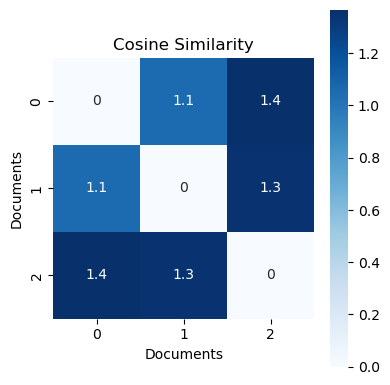

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(4, 4))
sns.heatmap(
    S,
    annot=True,
    cmap="Blues",
    square=True,
)
plt.xlabel('Documents')
plt.ylabel('Documents')
plt.title('Cosine Similarity')
plt.tight_layout()
plt.show()